In [11]:
import pandas as pd
import json

perturbed_bugs = { "Chart-26", "Cli-1" , "Closure-106" , "Codec-1" , 
                  "Collections-25" , "Compress-1" , "Csv-1" , "Gson-1" ,
                  "JacksonCore-1" , "JacksonDatabind-1" , "JacksonXml-1" ,
                  "Jsoup-1" , "JxPath-1" , "Lang-65" , "Math-106" ,
                  "Mockito-28" , "Time-27"
                 }

patchable_bugs = {'JacksonDatabind-40', 'Chart-24', 'JacksonDatabind-44', 'Lang-21', 'JacksonDatabind-82', 'JacksonDatabind-96', 'Closure-112', 'Closure-104', 'Cli-35', 'Codec-12', 'Closure-35', 'Closure-48', 'Cli-25', 'Jsoup-13', 'Mockito-1', 'Closure-39', 'Math-34', 'JacksonCore-6', 'JacksonCore-26', 'Codec-3', 'Lang-18', 'JacksonDatabind-41', 'JacksonCore-13', 'Csv-15', 'Collections-28', 'Time-19', 'Math-20', 'JacksonDatabind-27', 'Lang-31', 'JacksonDatabind-102', 'JacksonCore-11', 'JacksonDatabind-84', 'Closure-122', 'Math-95', 'Closure-67', 'Jsoup-10', 'Closure-77', 'Closure-168', 'Math-60', 'JacksonDatabind-93', 'Codec-9', 'Lang-55', 'Closure-118', 'Math-88', 'Lang-49', 'Closure-172', 'Math-69', 'Closure-57', 'Jsoup-43', 'Math-32', 'JacksonDatabind-37', 'Csv-2', 'Lang-64', 'JacksonDatabind-8', 'Mockito-12', 'Math-57', 'Closure-82', 'Time-15', 'Mockito-5', 'Jsoup-45', 'Math-13', 'Time-16', 'Chart-7', 'Cli-5', 'Time-20', 'Chart-17', 'Math-19', 'Closure-146', 'Cli-4', 'Mockito-33', 'Cli-28', 'Codec-7', 'Math-79', 'Closure-14', 'Closure-125', 'Closure-131', 'Closure-111', 'Math-94', 'Closure-92', 'Jsoup-32', 'Math-27', 'Jsoup-2', 'Csv-3', 'Closure-69', 'Jsoup-48', 'Cli-23', 'Closure-1', 'Closure-123', 'Mockito-27', 'Mockito-37', 'JacksonXml-3', 'Gson-6', 'JacksonDatabind-28', 'Csv-14', 'Math-59', 'JacksonXml-4', 'Closure-23', 'Cli-29', 'Math-45', 'Cli-20', 'Closure-166', 'Math-104', 'Chart-26', 'Closure-17', 'Codec-16', 'Math-56', 'Lang-40', 'Closure-128', 'Lang-61', 'JacksonCore-4', 'Math-12', 'Closure-96', 'Closure-22', 'Time-5', 'Closure-160', 'JacksonCore-5', 'Closure-119', 'JacksonDatabind-106', 'Codec-2', 'Jsoup-41', 'Closure-38', 'JacksonDatabind-5', 'Closure-59', 'Lang-37', 'Jsoup-37', 'JacksonDatabind-101', 'Gson-5', 'Lang-10', 'Chart-23', 'Math-85', 'Jsoup-19', 'Closure-86', 'Math-7', 'Lang-17', 'Jsoup-39', 'Closure-121', 'Mockito-26', 'Time-4', 'Math-53', 'JacksonCore-23', 'Cli-38', 'Lang-24', 'Chart-9', 'Closure-113', 'Lang-38', 'JacksonDatabind-12', 'Lang-52', 'Closure-11', 'Lang-57', 'Cli-8', 'JacksonDatabind-107', 'Jsoup-5', 'JacksonDatabind-24', 'Cli-11', 'Math-74', 'JacksonCore-20', 'Math-63', 'Closure-105', 'Closure-70', 'Lang-59', 'Gson-15', 'Jsoup-38', 'Jsoup-40', 'Chart-12', 'JacksonDatabind-1', 'Chart-6', 'Mockito-38', 'JacksonDatabind-11', 'Gson-17', 'Lang-9', 'Chart-3', 'Lang-45', 'Chart-13', 'Closure-36', 'Math-40', 'Closure-58', 'Jsoup-47', 'JacksonCore-15', 'JacksonDatabind-51', 'Closure-33', 'Lang-43', 'JacksonDatabind-85', 'Mockito-11', 'Math-3', 'Math-5', 'JxPath-21', 'Jsoup-20', 'Math-80', 'Collections-27', 'Csv-5', 'Jsoup-9', 'JacksonDatabind-46', 'Closure-71', 'Closure-129', 'Math-103', 'Cli-17', 'Codec-10', 'Closure-19', 'JacksonDatabind-45', 'Closure-66', 'Mockito-24', 'Lang-3', 'Closure-170', 'Math-91', 'Lang-33', 'Math-2', 'Chart-20', 'Mockito-13', 'Closure-40', 'Lang-12', 'Closure-83', 'Collections-26', 'Math-8', 'JacksonDatabind-70', 'Closure-107', 'Csv-1', 'Mockito-21', 'Jsoup-35', 'JxPath-5', 'Jsoup-6', 'Closure-150', 'Lang-1', 'Jsoup-8', 'JacksonDatabind-2', 'Cli-14', 'Closure-44', 'Math-30', 'Gson-18', 'Closure-161', 'Jsoup-27', 'Chart-8', 'Codec-17', 'Math-101', 'Csv-11', 'Lang-39', 'Closure-159', 'Jsoup-25', 'Time-11', 'Closure-114', 'Math-96', 'Jsoup-1', 'Closure-13', 'Gson-14', 'Gson-11', 'Time-24', 'Lang-42', 'Cli-32', 'Closure-102', 'Math-43', 'Cli-27', 'Jsoup-24', 'Gson-13', 'JxPath-10', 'Mockito-18', 'Compress-1', 'Math-42', 'Math-41', 'Mockito-7', 'JacksonDatabind-33', 'Lang-27', 'Closure-28', 'JacksonCore-14', 'Csv-9', 'Closure-78', 'Time-22', 'Jsoup-34', 'JacksonDatabind-19', 'JxPath-12', 'JacksonCore-7', 'Csv-4', 'JacksonDatabind-100', 'Closure-2', 'Gson-2', 'Closure-8', 'Cli-9', 'Closure-87', 'JacksonDatabind-58', 'Closure-101', 'Codec-5', 'Math-75', 'JacksonCore-3', 'Jsoup-44', 'Lang-48', 'Closure-73', 'JacksonDatabind-98', 'Csv-6', 'Closure-124', 'JxPath-22', 'Cli-37', 'JacksonDatabind-57', 'Math-87', 'Lang-16', 'Gson-16', 'Gson-10', 'JacksonCore-8', 'Closure-133', 'JacksonDatabind-88', 'Cli-12', 'Closure-109', 'Closure-126', 'Math-105', 'JacksonCore-25', 'Mockito-28', 'JacksonDatabind-42', 'JacksonDatabind-62', 'Lang-58', 'Mockito-8', 'Cli-2', 'JacksonDatabind-97', 'Mockito-34', 'JacksonDatabind-92', 'Jsoup-26', 'Math-25', 'Time-14', 'Closure-152', 'Closure-130', 'Closure-24', 'JacksonDatabind-49', 'JacksonDatabind-47', 'Time-18', 'Closure-91', 'Chart-4', 'Math-50', 'JacksonDatabind-86', 'Jsoup-15', 'Time-8', 'Lang-14', 'Math-89', 'Chart-10', 'JacksonDatabind-76', 'Math-48', 'Mockito-29', 'Closure-31', 'Closure-127', 'Math-9', 'Lang-54', 'Chart-5', 'Time-23', 'Lang-22', 'Time-25', 'Closure-46', 'JacksonDatabind-7', 'Math-33', 'Time-7', 'Lang-6', 'Closure-20', 'Cli-40', 'Gson-12', 'Jsoup-33', 'Closure-10', 'JacksonDatabind-34', 'JacksonDatabind-74', 'Math-11', 'JacksonDatabind-64', 'Closure-145', 'Lang-51', 'Codec-4', 'Time-27', 'Closure-88', 'Closure-132', 'Codec-18', 'Closure-62', 'Closure-12', 'JacksonDatabind-35', 'Lang-53', 'JacksonDatabind-17', 'Closure-61', 'Csv-12', 'Math-78', 'Lang-11', 'Time-17', 'JacksonDatabind-83', 'Closure-94', 'Cli-15', 'Mockito-20', 'Codec-15', 'Math-51', 'JacksonDatabind-71', 'JxPath-8', 'JacksonDatabind-39', 'Closure-18', 'Math-73', 'Closure-95', 'Closure-7', 'JacksonDatabind-26', 'Closure-52', 'Closure-65', 'Jsoup-17', 'Closure-97', 'Math-102', 'JacksonXml-5', 'Math-58', 'Closure-42', 'Math-70', 'Math-67', 'Math-82', 'JxPath-14', 'JacksonDatabind-89', 'Closure-55', 'Cli-26', 'Math-97', 'JacksonDatabind-112', 'JacksonDatabind-99', 'Jsoup-49', 'JacksonDatabind-91', 'Cli-19', 'JacksonDatabind-16', 'Math-52', 'Closure-120', 'Closure-81', 'Math-55', 'Chart-1', 'Closure-15', 'Math-10', 'JacksonCore-21', 'Closure-56', 'Lang-26', 'Cli-24', 'JacksonDatabind-67', 'JxPath-6', 'Lang-44', 'JacksonDatabind-9', 'Csv-10', 'Chart-11', 'Math-17', 'Jsoup-46', 'Lang-28', 'Math-39', 'Closure-5'}

def read_eval(path):
    df = pd.read_json(path, orient="index")
    df = df[~df.index.isin(perturbed_bugs)]
    return df

In [12]:
def get_number_compile(df):
    count = 0
    all_count = 0
    for index, row in df.iterrows():
        for fix in row.fixes:
            all_count += 1
            if fix["comp_pass"] and row.buggy_line != row.fixed_line:
                count += 1
    return "%d / %d (%.2f%%)" % (count, all_count, count/all_count*100)

In [13]:
def get_number_fixed(df):
    count = 0
    for index, row in df.iterrows():
        for i, fix in enumerate(row.fixes):
            if fix["test_pass"] and row.buggy_line != row.fixed_line:
                count += 1
                break
    return "%d / %d (%.2f%%)" % (count, len(df), count/len(df)*100)

In [14]:
def get_fixed(df):
    result = []
    for index, row in df.iterrows():
        for i, fix in enumerate(row.fixes):
            if fix["test_pass"] and row.buggy_line != row.fixed_line:
                result += [index]
    return result

In [15]:
def get_table_entry(beam_width, critic, round_, tbb, tbs, tdb, tds, cb, tb, cd, td):
    return {"Hyper Parameters": {
                "" :   { "Beam Width" : beam_width }
            },
            "Training": {
                "Bears" : {"BugLab" : tbb, "SelfAPR": tbs},
                "Defects4J" : {"BugLab" : tdb, "SelfAPR": tds},
                "Critic" : { "" : critic },
                "Round" : { "" : round_ }
            },
            "Testing":{
                "Bears Compile" : { "" : cb },
                "Bears Test Pass" : { "" : tb },
                "Defects4J Compile" : { "" : cd},
                "Defects4J Tests Pass" : { "" : td},
            }
       }

{'JacksonCore', 'JxPath', ' Math', 'Codec', 'Chart', 'Csv', 'Cli', ' Closure', 'Compress', 'Time', 'JacksonDatabind', 'Mockito', 'Math', 'Lang', 'Jsoup', 'Gson', 'Collections', 'Closure', ' Jsoup'}
{'Jsoup': {41, 43, 18, 85, 55, 24, 62}, 'Closure': {6, 13, 18, 30, 31, 38, 40, 168, 46, 57, 62, 70, 73, 86, 92, 102, 104, 113, 118, 126}, 'Cli': {5, 8, 17, 18, 25, 27, 28}, 'Lang': {33, 4, 6, 8, 10, 43, 51, 21, 55, 57, 26, 59}, 'Compress': {33, 4, 14, 19, 27, 30, 31}, 'Gson': {6}, 'Math': {32, 98, 5, 70, 104, 72, 75, 77, 46, 79, 80, 49, 82, 50, 85, 22, 57, 30}, 'JacksonDatabind': {99, 76, 46, 47, 49, 17, 57, 27}, 'Mockito': {34, 5, 8, 11, 26, 29}, 'Codec': {17, 2, 3, 7}, ' Jsoup': {49, 47}, 'Chart': {1, 4, 7, 8, 9, 11, 14, 20, 24}, 'JacksonCore': {25, 19, 5}, 'Csv': {9, 11}, 'JxPath': {10}, 'Time': {19, 4}, ' Closure': {11}, 'Collections': {26}, ' Math': {41}}
Fixed by SelfAPR only: {'Jsoup-62', 'Closure-118', 'Cli-5', 'Lang-10', 'Compress-4', 'Lang-8', 'Compress-31', 'Closure-30', 'Gson-6',

,Perturb Actions,Repair Actions,No. bugs,Repaired Bugs,Intersection,Intersection Repaired Bugs
0,P1 Replace type,Replace type,3,"Math-30,Math-79,Math-57",0,{}
1,P2 Replace operator,Replace operator,11,"Chart-1,Closure-62,Closure-73,Compress-19,Jack...",6,"{Chart-1, Closure-73, Math-82, JacksonCore-25,..."
2,P3 replace literal,Replace literal,14,"Closure-168,Closure-70,Closure-86,Codec-7,Coll...",4,"{Codec-3, Closure-86, Closure-70, Codec-7}"
3,P4 replace constructor,replace constructor,1,Lang-26,0,{}
4,P5 replace variable,Replace variable,14,"Chart-11,Chart-20,Chart-7,Chart-8,Time-4,Jacks...",5,"{Chart-20, Chart-24, Lang-59, Lang-6, Chart-11}"
5,P6 replace condition expression,Replace condition expression,16,"Closure-113,Closure-18,Closure-57,Mockito-29,M...",0,{}
6,P7 replace invocation,replace invocation,11,"Closure-30,Closure-92,Codec-17,Lang-4,Math-75,...",0,{}
7,P8 compound statement,compound statement,3,"Cli-18, Math-41,Mockito-11",0,{}
8,P9 replace with similarity,replace with similarity,5,"Mockito-5,Cli-28,Jsoup-41,Jsoup-85,Csv-11",0,{}
9,P10 move statement,move statement,2,"Closure-13, Jsoup-49",0,{}


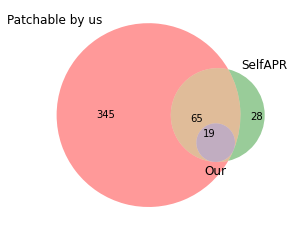

In [16]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted, venn3
from matplotlib import pyplot as plt

def compare_selfapr(selfapr_path, path):
    our_df = read_eval(path)
    our_fixed = set(get_fixed(our_df))
    selfapr_df = pd.read_csv(selfapr_path, delimiter=';')
    selfapr_fixed = set()
    
    intersection = []
    intersection_list = []
    for index, row in selfapr_df.iterrows():
        new_selfapr_fixes = set(filter(lambda x: x != "", row["Repaired Bugs"].split(",")))
        inter = new_selfapr_fixes.intersection(our_fixed)
        intersection += [len(inter)]
        intersection_list += [inter]
        selfapr_fixed.update(new_selfapr_fixes)
    selfapr_df["Intersection"] = intersection
    selfapr_df["Intersection Repaired Bugs"] = intersection_list
    
    venn3([patchable_bugs, selfapr_fixed, our_fixed], ("Patchable by us", "SelfAPR", "Our"))
    
    # Compute SelfAPR bugs for reproduction
    pids = set()
    bugs = {}
    for x in selfapr_fixed:
        pid, bid = x.split("-")[0], int(x.split("-")[1])
        pids.add(pid)
        if pid in bugs:
            bugs[pid].add(bid)
        else:
            bugs[pid] = set([bid])
    
    print(pids)
    print(bugs)
    
    print("Fixed by SelfAPR only: " + str(selfapr_fixed - our_fixed))
    print("Fixed by both: " + str(selfapr_fixed.intersection(our_fixed)))
    print("Fixed by us only: " + str(our_fixed - selfapr_fixed))
    print("Fixed by SelfAPR but not fixable by us" + str(selfapr_fixed - patchable_bugs))
    return selfapr_df

compare_selfapr("selfapr_fixed.csv", "experiments/defects4j_buglab/round1-tests/part2/fixer/eval_defects4j_bw_100.json")

In [17]:
entries = []

path = "experiments/defects4j_selfapr/round0/fixer/eval_defects4j_bw_100.json"
cb = "N/A"
tb = "N/A"
cd = get_number_compile(read_eval(path))
td = get_number_fixed(read_eval(path))
entries += [get_table_entry(100, "", "round0", "", "", "", "x", cb, tb, cd, td)]

path = "experiments/defects4j_selfapr/round0/fixer_new/eval_defects4j_bw_100.json"
cb = "N/A"
tb = "N/A"
cd = get_number_compile(read_eval(path))
td = get_number_fixed(read_eval(path))
entries += [get_table_entry(100, "", "round0_new", "", "", "", "x", cb, tb, cd, td)]

path = "experiments/defects4j_buglab/round0/fixer/eval_defects4j_bw_100.json"
cb = "N/A"
tb = "N/A"
cd = get_number_compile(read_eval(path))
td = get_number_fixed(read_eval(path))
entries += [get_table_entry(100, "", "round0", "", "", "x", "", cb, tb, cd, td)]

path = "experiments/defects4j_buglab/round0/fixer_new/eval_defects4j_bw_100.json"
cb = "N/A"
tb = "N/A"
cd = get_number_compile(read_eval(path))
td = get_number_fixed(read_eval(path))
entries += [get_table_entry(100, "", "round0_new", "", "", "x", "", cb, tb, cd, td)]

path = "experiments/defects4j_buglab/round1-nocritic/part2/fixer/eval_defects4j_bw_100.json"
cb = "N/A"
tb = "N/A"
cd = get_number_compile(read_eval(path))
td = get_number_fixed(read_eval(path))
entries += [get_table_entry(100, "nocritic", "round1", "", "", "x", "", cb, tb, cd, td)]

path = "experiments/defects4j_buglab/round2-nocritic/part2/fixer/eval_defects4j_bw_100.json"
cb = "N/A"
tb = "N/A"
cd = get_number_compile(read_eval(path))
td = get_number_fixed(read_eval(path))
entries += [get_table_entry(100, "nocritic", "round2", "", "", "x", "", cb, tb, cd, td)]

path = "experiments/defects4j_buglab/round1-compiler/part2/fixer/eval_defects4j_bw_100.json"
cb = "N/A"
tb = "N/A"
cd = get_number_compile(read_eval(path))
td = get_number_fixed(read_eval(path))
entries += [get_table_entry(100, "compiler", "round1", "", "", "x", "", cb, tb, cd, td)]

path = "experiments/defects4j_buglab/round1-tests/part2/fixer/eval_defects4j_bw_100.json"
cb = "N/A"
tb = "N/A"
cd = get_number_compile(read_eval(path))
td = get_number_fixed(read_eval(path))
entries += [get_table_entry(100, "tests", "round1", "", "", "x", "", cb, tb, cd, td)]

In [18]:
table = pd.json_normalize(data=entries)
table.columns = table.columns.str.split(".").map(tuple)
table

Hyper Parameters Training                                                  \
                      Bears         Defects4J            Critic       Round   
        Beam Width   BugLab SelfAPR    BugLab SelfAPR                         
0              100                                  x                round0   
1              100                                  x            round0_new   
2              100                          x                        round0   
3              100                          x                    round0_new   
4              100                          x          nocritic      round1   
5              100                          x          nocritic      round2   
6              100                          x          compiler      round1   
7              100                          x             tests      round1   

        Testing                                                           
  Bears Compile Bears Test Pass   Defects4J Compile Defects4J Tests Pass  
                                                                          
0           N/A             N/A  12 / 42200 (0.03%)     11 / 422 (2.61%)  
1           N/A             N/A  13 / 42200 (0.03%)     13 / 422 (3.08%)  
2           N/A             N/A  13 / 42200 (0.03%)     12 / 422 (2.84%)  
3           N/A             N/A  13 / 42200 (0.03%)     13 / 422 (3.08%)  
4           N/A             N/A  13 / 42200 (0.03%)     12 / 422 (2.84%)  
5           N/A             N/A  10 / 42200 (0.02%)     10 / 422 (2.37%)  
6           N/A             N/A  21 / 42200 (0.05%)     19 / 422 (4.50%)  
7           N/A             N/A  23 / 42200 (0.05%)     19 / 422 (4.50%)